**Predicting Housing Prices in Melbourne. and Understanding Trends in the Melbourne Housing Data.**

**1. Dependent Variable - Price**

In [1]:
## Importing packages
list.files(path = "../input")

[1] "melbourne-housing-market"

In [2]:
#installing required packages
install.packages("corrplot")
install.packages("rpart.plot")
install.packages("tree")
install.packages("Metrics")
install.packages("randomForest")
install.packages("dummies")
install.packages("ggcorrplot")
install.packages("VIF")
install.packages("car")
install.packages("corrplot")
install.packages("gvlma")
install.packages("MASS")
install.packages("dplyr")
install.packages("stringr")
install.packages("metrics")
install.packages("glmnet")
install.packages("lava")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘corrplot’ is not available (for R version 3.6.0)”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘rpart.plot’ is not available (for R version 3.6.0)”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tree’ is not available (for R version 3.6.0)”
Installing package into ‘/usr/local/lib/R/sit

In [3]:
library(glmnet)
library(lava)
library(stringr)
library(dplyr)
library(tidyr)
library(dummies)
library(ggcorrplot)
library(corrplot)
library(VIF)
library(MASS)
library(car)
library(rpart.plot)
library(tree)
library(Metrics)
library(randomForest)
library(gvlma)
library(dplyr)
library(tidyr)

Loading required package: Matrix

Loaded glmnet 3.0-1



Attaching package: ‘dplyr’


The following object is masked from ‘package:lava’:

    vars


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


dummies-1.5.6 provided by Decision Patterns


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:lava’:

    vars


corrplot 0.84 loaded


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:VIF’:

    vif


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:lava’:

    logit


Loading requi

In [4]:
options(scipen=999)  #removing scientific notations.
options(max.print=1000000) #maximum print

In [5]:
#data input
mel <- read.csv("../input/melbourne-housing-market//Melbourne_housing_FULL.csv")

In [6]:
#Exploring the data
my_missing_NA_value_function <- function(dataset){
  
  Total_NA <- sum(is.na(dataset))
  Column_sums <- colSums(is.na(dataset))
  cat("Total NA in the dataset in all in the columns- \n\n",Total_NA)
  cat("\n--------------##-----------------")
  Column_names <- colnames(dataset)[apply(dataset,2,anyNA)]
  cat('\n\n Names of NA columns in the dataset-\n\n',Column_names)
  cat('\n\n Total NA by column in the dataset-\n\n',Column_sums)
  cat("\n--------------##-----------------")
}

my_data_overview <- function(dataset){
  data <- dim(dataset)
  cat("\nTotal Number of [rows vs columns] in the dataset- \n",data)
  cat("\n--------------##-----------------")
  Column_datatypes <- sapply(dataset,class)
  cat('\n\n Datatypes of all the columns in the dataset-\n',Column_datatypes)
  cat("\n--------------##-----------------")
  Column_Names <- colnames(dataset)
  cat('\n\n Names of all the columns in the dataset-\n',Column_Names)    
}

my_data_overview(mel)
my_missing_NA_value_function(mel)


Total Number of [rows vs columns] in the dataset- 
 34857 21
--------------##-----------------

 Datatypes of all the columns in the dataset-
 factor factor integer factor integer factor factor factor factor factor integer integer integer integer numeric integer factor numeric numeric factor factor
--------------##-----------------

 Names of all the columns in the dataset-
 Suburb Address Rooms Type Price Method SellerG Date Distance Postcode Bedroom2 Bathroom Car Landsize BuildingArea YearBuilt CouncilArea Lattitude Longtitude Regionname PropertycountTotal NA in the dataset in all in the columns- 

 100964
--------------##-----------------

 Names of NA columns in the dataset-

 Price Bedroom2 Bathroom Car Landsize BuildingArea YearBuilt Lattitude Longtitude

 Total NA by column in the dataset-

 0 0 0 0 7610 0 0 0 0 0 8217 8226 8728 11810 21115 19306 0 7976 7976 0 0
--------------##-----------------

In [7]:
########################## Correction of Data types ########################
#checking datatypes of all column in dataset
mel$Address <- as.character(mel$Address)    #changing dataset from factor to character
mel$Rooms <- as.factor(mel$Rooms)   #changing dataset from integer to factor
mel$Distance<- as.integer(mel$Distance)   #changing dataset from factor to integer
mel$Bathroom <- as.factor(mel$Bathroom)    #changing dataset from integer to factor
mel$Car <- as.numeric(mel$Car)            #changing dataset from integer to factor

sapply(mel, class)   #Re-checking datatypes of all column in dataset


Suburb       Address         Rooms          Type         Price 
     "factor"   "character"      "factor"      "factor"     "integer" 
       Method       SellerG          Date      Distance      Postcode 
     "factor"      "factor"      "factor"     "integer"      "factor" 
     Bedroom2      Bathroom           Car      Landsize  BuildingArea 
    "integer"      "factor"     "numeric"     "integer"     "numeric" 
    YearBuilt   CouncilArea     Lattitude    Longtitude    Regionname 
    "integer"      "factor"     "numeric"     "numeric"      "factor" 
Propertycount 
     "factor"

In [8]:
######################### NA's Count in each column ########################
colSums(is.na(mel))

#Remove NA values of Price as its dependent variable
mel1 <- subset(mel,(!is.na(mel[,5])))
colSums(is.na(mel1))
dim(mel1)

Suburb       Address         Rooms          Type         Price 
            0             0             0             0          7610 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize  BuildingArea 
         8217          8226          8728         11810         21115 
    YearBuilt   CouncilArea     Lattitude    Longtitude    Regionname 
        19306             0          7976          7976             0 
Propertycount 
            0

Suburb       Address         Rooms          Type         Price 
            0             0             0             0             0 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize  BuildingArea 
         6441          6447          6824          9265         16591 
    YearBuilt   CouncilArea     Lattitude    Longtitude    Regionname 
        15163             0          6254          6254             0 
Propertycount 
            0

[1] 27247    21

In [9]:
#Remove BuildingArea Column as it consist more then 60% of NA values
mel2 <- mel1[,c(1:14,16:21)]
colSums(is.na(mel2))
dim(mel2)

Suburb       Address         Rooms          Type         Price 
            0             0             0             0             0 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize     YearBuilt 
         6441          6447          6824          9265         15163 
  CouncilArea     Lattitude    Longtitude    Regionname Propertycount 
            0          6254          6254             0             0

[1] 27247    20

In [10]:
mel4 <- mel2

#73% of the data for the rooms and Bedrooms is same i.e example if rooms==2 then bedroom2 ==2
temp <- mel4[,c("Rooms","Bedroom2")]
bedroom2 <- temp[which(temp$Rooms == temp$Bedroom2),]
(length(bedroom2$Rooms) / length(mel4$Rooms)) * 100

#thus assigning the NA's of Bedrooms with the values of rooms.
my.na <- is.na(mel4$Bedroom2)
mel4$Bedroom2[my.na] <- mel4$Rooms[my.na]
colSums(is.na(mel4))

[1] 73.71454

Suburb       Address         Rooms          Type         Price 
            0             0             0             0             0 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize     YearBuilt 
            0          6447          6824          9265         15163 
  CouncilArea     Lattitude    Longtitude    Regionname Propertycount 
            0          6254          6254             0             0

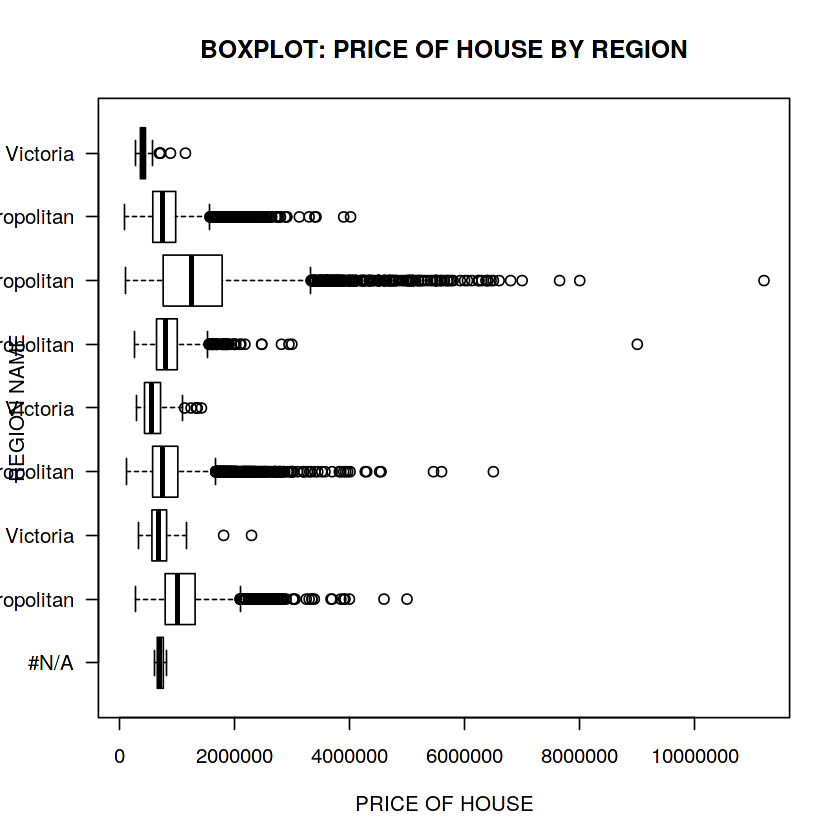

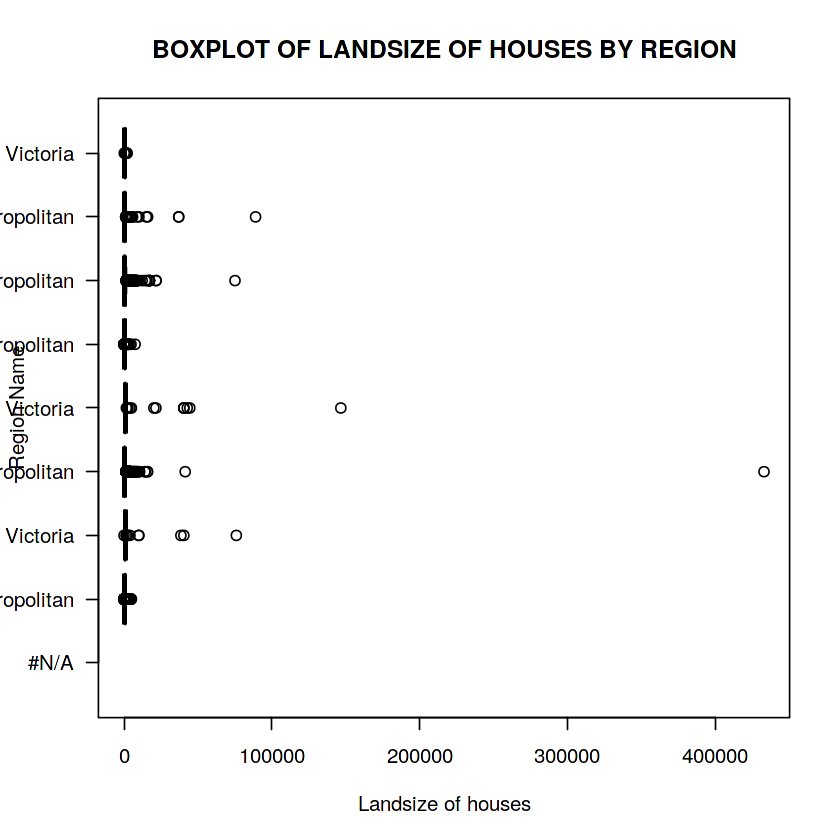

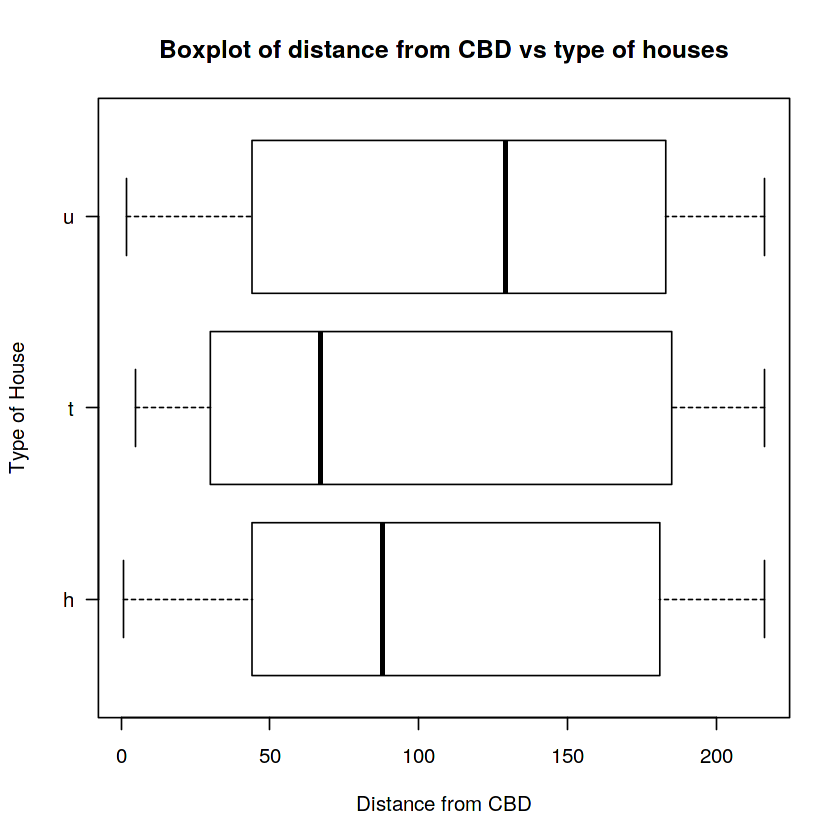

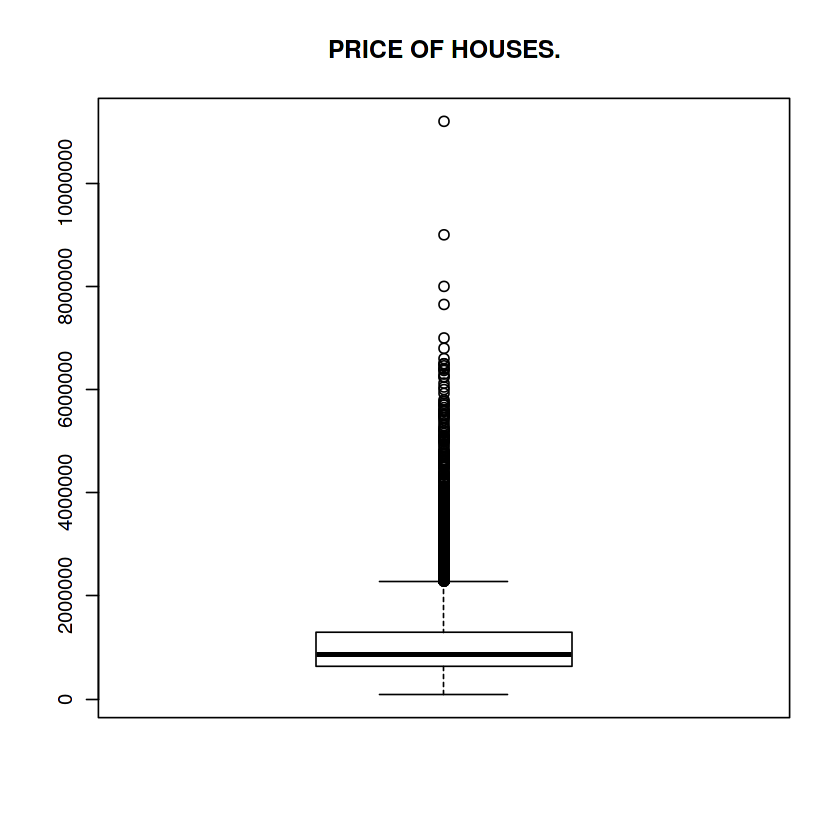

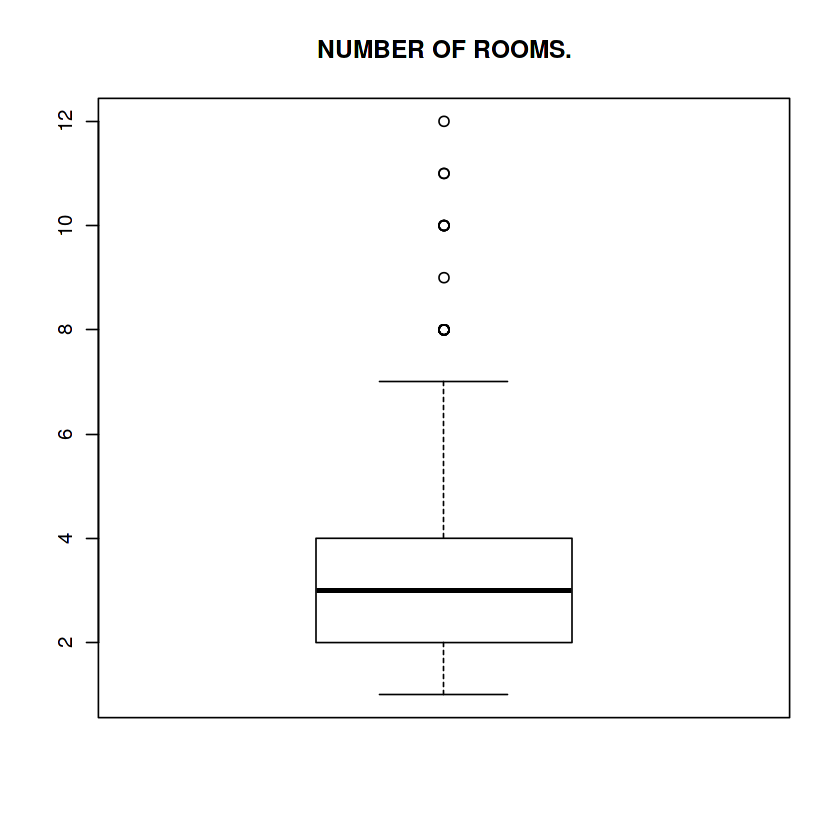

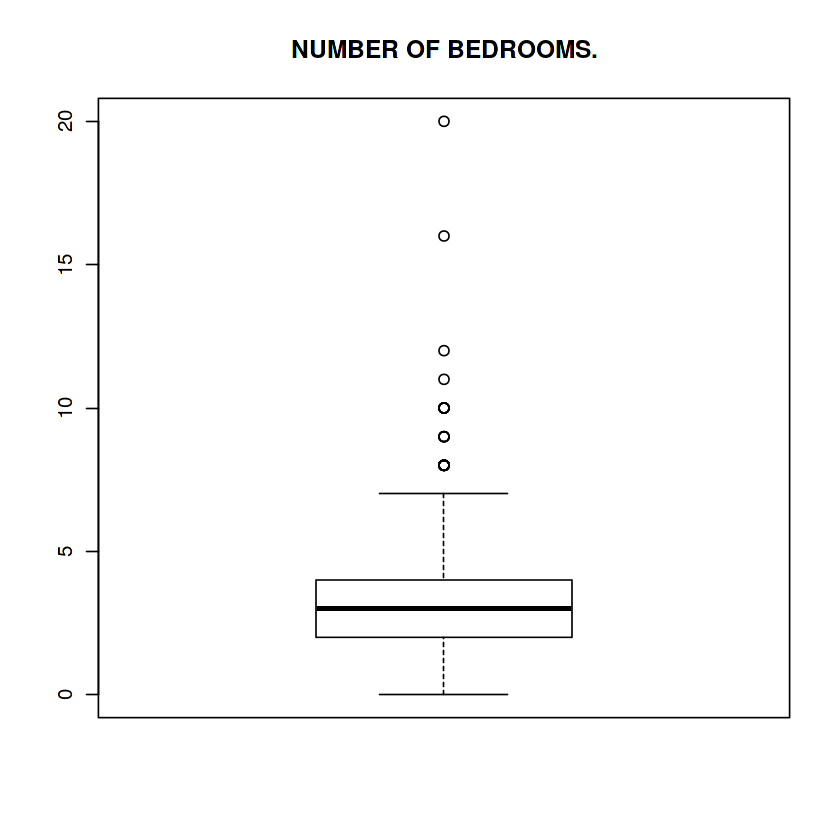

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
,<fct>,<chr>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>
617,Ashburton,115 Ashburn Gr,8,h,2950000,S,hockingstuart,10/09/2016,20,3147,9,7,4,1472,2009,Boroondara City Council,-37.87290,145.0788,Southern Metropolitan,3052
2614,Burwood,445 Warrigal Rd,10,h,1960000,S,Kay,27/11/2016,25,3125,10,NA,NA,NA,NA,Monash City Council,-37.86050,145.0940,Southern Metropolitan,5678
3289,Coburg,35 The Grove,8,u,2250000,PI,Peter,4/03/2017,197,3058,4,2,4,983,NA,Darebin City Council,-37.75170,144.9699,Northern Metropolitan,11204
5410,Heidelberg Heights,478 Waterdale Rd,8,h,770000,VB,Miles,19/11/2016,15,3081,8,4,4,638,1960,Banyule City Council,-37.74260,145.0480,Eastern Metropolitan,2947
5986,Kew,31 Peel St,8,h,3130000,S,Jellis,18/03/2017,178,3101,8,NA,NA,NA,NA,Boroondara City Council,-37.80340,145.0331,Southern Metropolitan,10331
7135,Newport,487 Melbourne Rd,8,h,881000,S,Jas,30/07/2016,202,3015,6,2,4,663,1920,Hobsons Bay City Council,-37.83850,144.8824,Western Metropolitan,5498
7536,Oakleigh South,17 Windsor Av,9,h,1380000,S,Ray,10/09/2016,51,3167,9,NA,NA,NA,NA,Kingston City Council,NA,NA,South-Eastern Metropolitan,3692
7591,Parkville,42 Park Dr,8,u,3210000,S,Kelly,10/12/2016,83,3052,8,NA,NA,NA,NA,Melbourne City Council,NA,NA,Northern Metropolitan,2309
7599,Parkville,84 Flemington Rd,10,h,2800000,VB,Nelson,16/04/2016,83,3052,10,NA,NA,NA,NA,Melbourne City Council,-37.78890,144.9421,Northern Metropolitan,2309


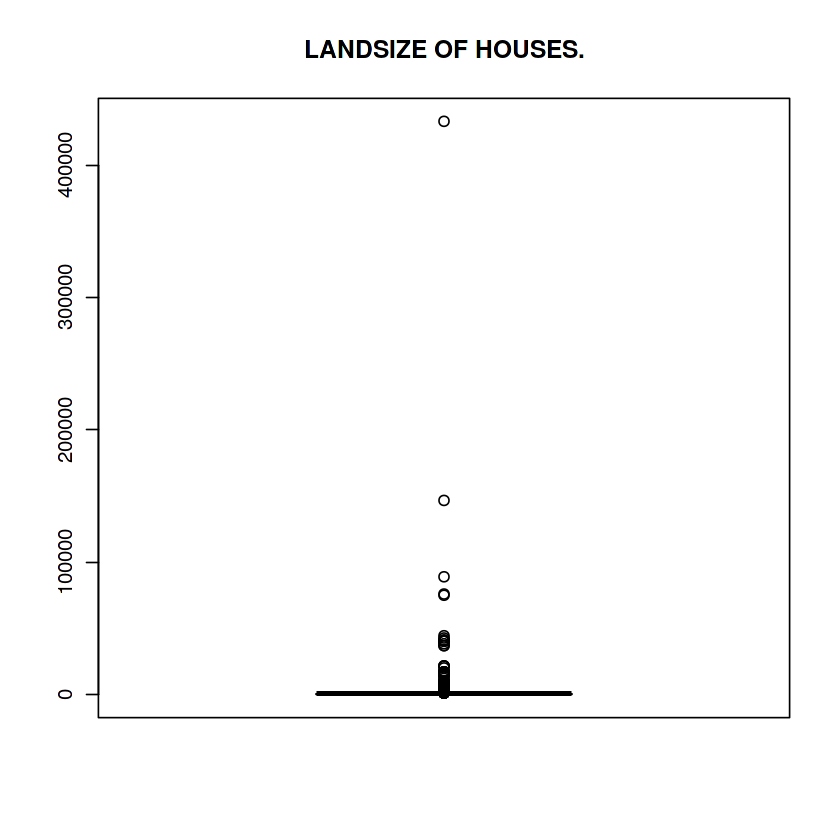

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
,<fct>,<chr>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>
391,Armadale,553 Dandenong Rd,5,h,1525000,PI,Jellis,7/05/2016,184,3143,8,2,2,693,NA,Stonnington City Council,-37.8638,145.0229,Southern Metropolitan,4836
8252,Preston,421 Murray Rd,4,h,760000,PI,Barry,22/05/2016,206,3072,9,8,7,1254,1928,Darebin City Council,-37.7367,144.9895,Northern Metropolitan,14577
11271,Fawkner,39 Lynch Rd,3,h,751000,S,Stockdale,17/09/2016,31,3060,9,6,2,592,1960,Hume City Council,-37.7120,144.9719,Northern Metropolitan,5070
12044,Caulfield East,5 Grange Rd,3,h,1650000,PI,Woodards,6/08/2016,211,3145,20,1,2,875,NA,Glen Eira City Council,-37.8815,145.0491,Southern Metropolitan,608
27391,Vermont South,440 Burwood Hwy,4,h,1600000,S,Buxton,11/11/2017,66,3133,10,6,7,650,NA,Whitehorse City Council,-37.8563,145.1782,Eastern Metropolitan,4280
27392,Vermont South,442 Burwood Hwy,3,h,1600000,SP,Buxton,11/11/2017,66,3133,10,6,7,648,NA,Whitehorse City Council,-37.8564,145.1784,Eastern Metropolitan,4280


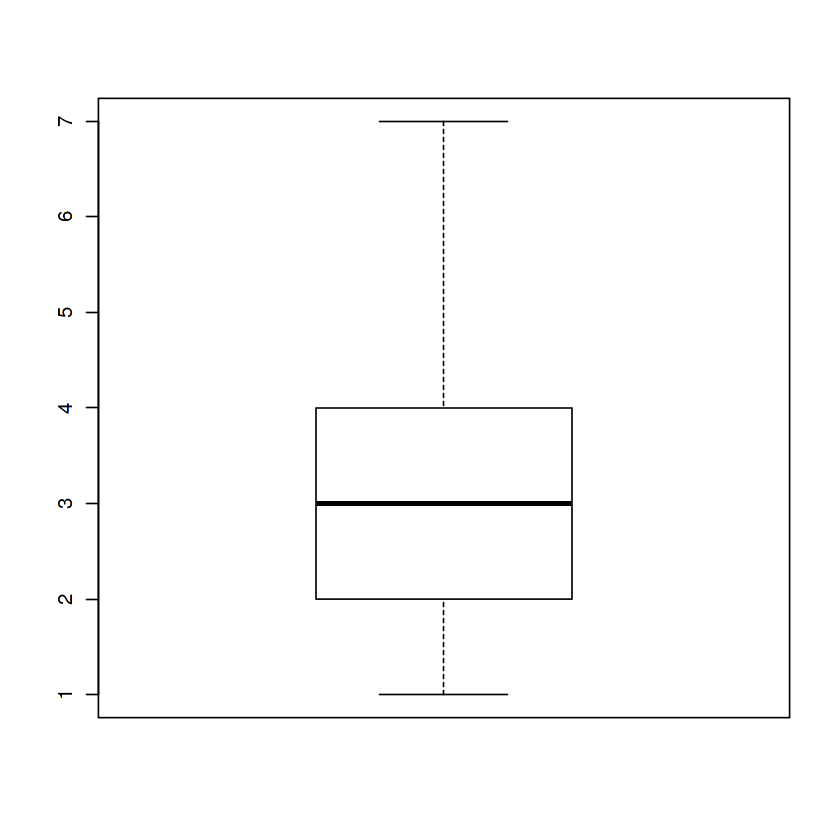

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
,<fct>,<chr>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>
42,Abbotsford,138/56 Nicholson St,3,u,1090000,S,Jellis,18/03/2017,82,3067,3,2,2,4290,NA,Yarra City Council,-37.8078,144.9965,Northern Metropolitan,4019
389,Armadale,526 Orrong Rd,4,h,3000000,VB,Jellis,4/06/2016,184,3143,4,2,2,1581,1934,Stonnington City Council,-37.8580,145.0111,Southern Metropolitan,4836
393,Armadale,9/19 Mercer Rd,3,u,735000,PI,Marshall,7/05/2016,184,3143,3,2,1,2113,1970,Stonnington City Council,-37.8543,145.0262,Southern Metropolitan,4836
427,Armadale,367 Dandenong Rd,6,h,5525000,S,Marshall,17/09/2016,184,3143,5,3,4,1491,1935,Stonnington City Council,-37.8602,145.0130,Southern Metropolitan,4836
454,Armadale,10/51 Armadale St,2,u,710000,S,Jellis,25/02/2017,184,3143,2,1,1,2471,1970,Stonnington City Council,-37.8573,145.0186,Southern Metropolitan,4836
570,Ascot Vale,18/54 Epsom Rd,2,u,390000,PI,Jellis,25/02/2017,181,3032,2,1,1,1957,2012,Moonee Valley City Council,-37.7731,144.9074,Western Metropolitan,6567
773,Avondale Heights,22 Warrick Ct,4,h,1600000,PI,Nelson,10/12/2016,15,3034,4,3,3,1801,NA,Moonee Valley City Council,-37.7532,144.8766,Western Metropolitan,4502
859,Balwyn,349 Union Rd,6,h,4000000,VB,Jellis,3/12/2016,214,3103,6,4,7,2051,1935,Boroondara City Council,-37.8051,145.1016,Southern Metropolitan,5682
976,Balwyn,275 Union Rd,5,h,2810000,PI,Jellis,25/02/2017,214,3103,5,3,4,1468,NA,Boroondara City Council,-37.8131,145.1000,Southern Metropolitan,5682


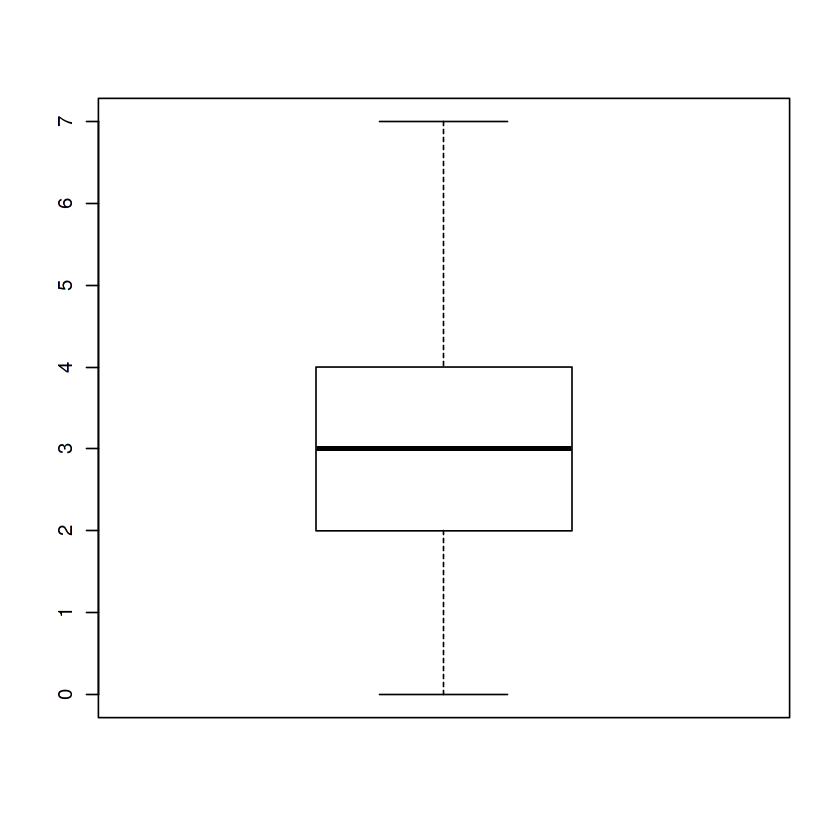

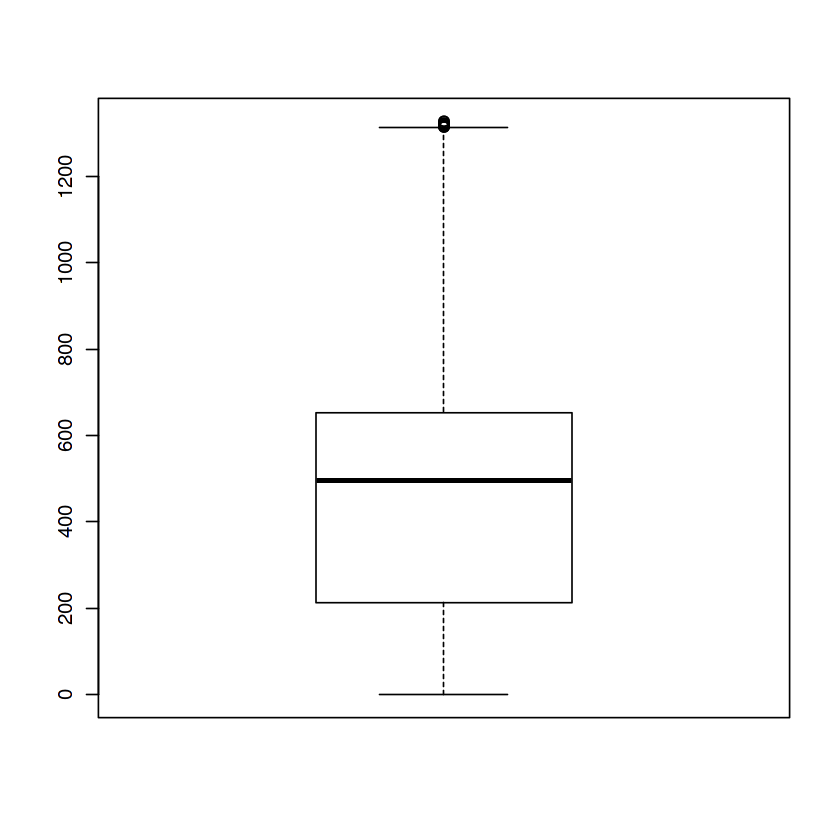

In [11]:
########################## Outliers ############################

#Checking the outliers

boxplot(mel4$Price ~ mel4$Regionname, horizontal = TRUE, ylab = "REGION NAME", xlab = "PRICE OF HOUSE", main = "BOXPLOT: PRICE OF HOUSE BY REGION", las = 1)
#par(mar=c(3.1,12,0.95,2.1), mgp = c(11, 1, 0), mfrow = c(2,1))

boxplot(mel4$Landsize ~ mel4$Regionname, horizontal = TRUE, xlab = "Landsize of houses", ylab = "Region Name", main = "BOXPLOT OF LANDSIZE OF HOUSES BY REGION", las = 1)

boxplot(mel4$Distance ~ mel4$Type, horizontal = TRUE, ylab = "Type of House", xlab = "Distance from CBD", main = "Boxplot of distance from CBD vs type of houses", las = 1)

#Checking outliers based on summary
boxplot(mel4$Price,main = "PRICE OF HOUSES.")
mel4$Rooms <- as.integer(mel4$Rooms)
boxplot(mel4$Rooms,main = "NUMBER OF ROOMS.")
boxplot(mel4$Bedroom2,main = "NUMBER OF BEDROOMS.")
boxplot(mel4$Landsize,main="LANDSIZE OF HOUSES.")

#Removing outlier from Rooms column
outliers <- boxplot(mel4$Rooms, plot=FALSE)$out
mel4[which(mel4$Rooms %in% outliers),]
mel4 <- mel4[-which(mel4$Rooms %in% outliers),]
boxplot(mel4$Rooms)

#Removing outlier from Bedroom2 column
outliers <- boxplot(mel4$Bedroom2, plot=FALSE)$out
mel4[which(mel4$Bedroom2 %in% outliers),]
mel4 <- mel4[-which(mel4$Bedroom2 %in% outliers),]
boxplot(mel4$Bedroom2)

#Removing outlier from Landsize column
outliers <- boxplot(mel4$Landsize, plot=FALSE)$out
mel4[which(mel4$Landsize %in% outliers),]
mel4 <- mel4[-which(mel4$Landsize %in% outliers),]
boxplot(mel4$Landsize)


In [12]:
#landsize column fixation
#Making new dataframe of Bedrooms & Landsize
bed.land.df <- mel4[,c("Bedroom2","Landsize")]
unique(bed.land.df$Bedroom2)
colSums(is.na(bed.land.df))
bed.land.df <- na.omit(bed.land.df)
bed.land.df <- bed.land.df[which(bed.land.df$Landsize > 0),]

colSums(is.na(bed.land.df))

bed.land.df_0 <- bed.land.df[which(bed.land.df$Bedroom2 == 0),]
bed.land.df_1 <-  bed.land.df[which(bed.land.df$Bedroom2 == 1),]
bed.land.df_2 <- bed.land.df[which(bed.land.df$Bedroom2 == 2),]
bed.land.df_3 <-  bed.land.df[which(bed.land.df$Bedroom2 == 3),]
bed.land.df_4 <- bed.land.df[which(bed.land.df$Bedroom2 == 4),]
bed.land.df_5 <-  bed.land.df[which(bed.land.df$Bedroom2 == 5),]
bed.land.df_6 <- bed.land.df[which(bed.land.df$Bedroom2 == 6),]
bed.land.df_7 <-  bed.land.df[which(bed.land.df$Bedroom2 == 7),]

#Replacing Na values with 0
mel4$Landsize[which(is.na(mel4$Landsize))] <- 0

#120 logic is used here under the assumption that minimun sq feet required is 
#120 mtrs according to the https://www.godownsize.com/minimum-house-square-footage/

mel4$Landsize[which(mel4$Landsize < 120)] <- 0


[1] 2 3 4 1 5 6 0 7

Bedroom2 Landsize 
       0     9255

Bedroom2 Landsize 
       0        0

In [13]:
#Replacing 0 values with median values
mel4$Landsize[which(mel4$Bedroom2 == 0 & mel4$Landsize== 0)] <- median(bed.land.df_0$Landsize[which(bed.land.df_0$Landsize > 1)]) 
mel4$Landsize[which(mel4$Bedroom2 == 1 & mel4$Landsize== 0)] <- median(bed.land.df_1$Landsize[which(bed.land.df_1$Landsize > 1)]) 
mel4$Landsize[which(mel4$Bedroom2 == 2 & mel4$Landsize== 0)] <- median(bed.land.df_2$Landsize[which(bed.land.df_2$Landsize > 1)]) 
mel4$Landsize[which(mel4$Bedroom2 == 3 & mel4$Landsize== 0) ] <- median(bed.land.df_3$Landsize[which(bed.land.df_3$Landsize > 1)]) 
mel4$Landsize[which(mel4$Bedroom2 == 4 & mel4$Landsize== 0) ] <- median(bed.land.df_4$Landsize[which(bed.land.df_4$Landsize > 1)]) 
mel4$Landsize[which(mel4$Bedroom2 == 5 & mel4$Landsize== 0) ] <- median(bed.land.df_5$Landsize[which(bed.land.df_5$Landsize > 1)]) 
mel4$Landsize[which(mel4$Bedroom2 == 6 & mel4$Landsize== 0) ] <- median(bed.land.df_6$Landsize[which(bed.land.df_6$Landsize > 1)]) 
mel4$Landsize[which(mel4$Bedroom2 == 7 & mel4$Landsize== 0) ] <- median(bed.land.df_7$Landsize[which(bed.land.df_7$Landsize > 1)]) 

#Checking if all the value got atleast 100 those are zero
mel4$Landsize[which(mel4$Landsize < 120)]
summary(mel4)

#Car Column
#Putting median in all the NA values of Car column
mel4$Car <- as.numeric(mel4$Car)
mel4$Car[is.na(mel4$Car)] <- median(mel4$Car[which(!is.na(mel4$Car))])
colSums(is.na(mel4))

#Putting 0 in all the NA values of YearBuilt column
mel4$YearBuilt <- as.numeric(mel4$YearBuilt)
mel4$YearBuilt[which(is.na(mel4$YearBuilt))] <- 0

numeric(0)

            Suburb        Address              Rooms       Type     
 Reservoir     :  724   Length:26766       Min.   :1.000   h:18269  
 Bentleigh East:  493   Class :character   1st Qu.:2.000   t: 2843  
 Richmond      :  417   Mode  :character   Median :3.000   u: 5654  
 Preston       :  412                      Mean   :2.992            
 Brunswick     :  383                      3rd Qu.:4.000            
 Essendon      :  359                      Max.   :7.000            
 (Other)       :23978                                               
     Price             Method               SellerG              Date      
 Min.   :  85000   S      :17260   Nelson       : 2696   28/10/2017:  865  
 1st Qu.: 638000   SP     : 3532   Jellis       : 2469   17/03/2018:  741  
 Median : 872500   PI     : 3178   Barry        : 2372   24/02/2018:  717  
 Mean   :1047433   VB     : 2610   hockingstuart: 2068   9/12/2017 :  714  
 3rd Qu.:1295000   SA     :  186   Ray          : 1561   25/11/2017:

Suburb       Address         Rooms          Type         Price 
            0             0             0             0             0 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize     YearBuilt 
            0          6440             0             0         14961 
  CouncilArea     Lattitude    Longtitude    Regionname Propertycount 
            0          6250          6250             0             0

In [14]:
#Bathrooms column fixation
#ideally according to the https://hoa.org.uk/2017/05/room-ratio/# for every house 
#it should be a ratio of 3:2 to maximise its value and desirability.
#So 
#1 - 1
#2 - 1
#3 - 2
#4 - 2.5
#5 - 3
#6 - 4
#7 - 4.5

mel4$Bathroom <- as.integer(mel4$Bathroom)
mel4$Bathroom[which(is.na(mel4$Bathroom) & mel4$Bedroom2== 1)] <- 1
mel4$Bathroom[which(is.na(mel4$Bathroom) & mel4$Bedroom2== 2)] <- 1
mel4$Bathroom[which(is.na(mel4$Bathroom) & mel4$Bedroom2== 3)] <- 2
mel4$Bathroom[which(is.na(mel4$Bathroom) & mel4$Bedroom2== 4)] <- 2.5
mel4$Bathroom[which(is.na(mel4$Bathroom) & mel4$Bedroom2== 5)] <- 3
mel4$Bathroom[which(is.na(mel4$Bathroom) & mel4$Bedroom2== 6)] <- 4
mel4$Bathroom[which(is.na(mel4$Bathroom) & mel4$Bedroom2== 7)] <- 4.5

summary(mel4)

mel4 <- mel4[which(mel4$CouncilArea != '#N/A'),]
colSums(is.na(mel4))
dim(mel4)

#reverting back the datatypes which were changed in order to calculate the median.
mel4$Car <- as.numeric(mel4$Car)
mel4$Bathroom <- as.factor(mel4$Bathroom)
mel4$YearBuilt <- as.factor(mel4$YearBuilt)
mel4$Rooms <- as.factor(mel4$Rooms)

            Suburb        Address              Rooms       Type     
 Reservoir     :  724   Length:26766       Min.   :1.000   h:18269  
 Bentleigh East:  493   Class :character   1st Qu.:2.000   t: 2843  
 Richmond      :  417   Mode  :character   Median :3.000   u: 5654  
 Preston       :  412                      Mean   :2.992            
 Brunswick     :  383                      3rd Qu.:4.000            
 Essendon      :  359                      Max.   :7.000            
 (Other)       :23978                                               
     Price             Method               SellerG              Date      
 Min.   :  85000   S      :17260   Nelson       : 2696   28/10/2017:  865  
 1st Qu.: 638000   SP     : 3532   Jellis       : 2469   17/03/2018:  741  
 Median : 872500   PI     : 3178   Barry        : 2372   24/02/2018:  717  
 Mean   :1047433   VB     : 2610   hockingstuart: 2068   9/12/2017 :  714  
 3rd Qu.:1295000   SA     :  186   Ray          : 1561   25/11/2017:

Suburb       Address         Rooms          Type         Price 
            0             0             0             0             0 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize     YearBuilt 
            0             0             0             0             0 
  CouncilArea     Lattitude    Longtitude    Regionname Propertycount 
            0          6247          6247             0             0

[1] 26763    20

In [15]:
#omitting the missing values from lattitude and longitude
mel4 <- na.omit(mel4)
#------------
str(mel4)
#dropping unused levels from the dataframe.
mel4$Postcode <- droplevels(mel4$Postcode)
mel4$CouncilArea <- droplevels(mel4$CouncilArea)
mel4$Regionname <- droplevels(mel4$Regionname)
mel4$Propertycount <- droplevels(mel4$Propertycount)
str(mel4)

table(mel4$CouncilArea)
#-------------
#converting RegionName into numeric
mel4$Regionname <- as.character(mel4$Regionname)
mel4$Regionname[mel4$Regionname == 'Eastern Metropolitan'] <- 1
mel4$Regionname[mel4$Regionname == 'Eastern Victoria'] <- 2
mel4$Regionname[mel4$Regionname == 'Northern Metropolitan'] <- 3
mel4$Regionname[mel4$Regionname == 'Northern Victoria'] <- 4
mel4$Regionname[mel4$Regionname == 'South-Eastern Metropolitan'] <- 5
mel4$Regionname[mel4$Regionname == 'Southern Metropolitan'] <- 6
mel4$Regionname[mel4$Regionname == 'Western Metropolitan'] <- 7
mel4$Regionname[mel4$Regionname == 'Western Victoria'] <- 8

#converting method into numeric
mel4$Method = as.character(mel4$Method)
mel4$Method[mel4$Method == 'PI'] <- 1
mel4$Method[mel4$Method == 'PN'] <- 2
mel4$Method[mel4$Method == 'S'] <- 3
mel4$Method[mel4$Method == 'SA'] <- 4
mel4$Method[mel4$Method == 'SN'] <- 5
mel4$Method[mel4$Method == 'SP'] <- 6
mel4$Method[mel4$Method == 'SS'] <- 7
mel4$Method[mel4$Method == 'VB'] <- 8
mel4$Method[mel4$Method == 'W'] <- 9

#converting type into numeric
mel4$Type <- as.character(mel4$Type)
mel4$Type[mel4$Type == 'h'] <- 1
mel4$Type[mel4$Type == 't'] <- 2
mel4$Type[mel4$Type == 'u'] <- 3

'data.frame':	20516 obs. of  20 variables:
 $ Suburb       : Factor w/ 351 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address      : chr  "85 Turner St" "25 Bloomburg St" "5 Charles St" "40 Federation La" ...
 $ Rooms        : Factor w/ 7 levels "1","2","3","4",..: 2 2 3 3 4 2 3 2 1 2 ...
 $ Type         : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 3 1 ...
 $ Price        : int  1480000 1035000 1465000 850000 1600000 941000 1876000 1636000 300000 1097000 ...
 $ Method       : Factor w/ 9 levels "PI","PN","S",..: 3 3 6 1 8 3 3 3 3 3 ...
 $ SellerG      : Factor w/ 388 levels "@Realty","A",..: 34 34 34 34 246 171 246 246 34 34 ...
 $ Date         : Factor w/ 78 levels "1/07/2017","10/02/2018",..: 61 64 65 65 66 71 71 76 76 76 ...
 $ Distance     : int  82 82 82 82 82 82 82 82 82 82 ...
 $ Postcode     : Factor w/ 212 levels "#N/A","3000",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Bedroom2     : int  2 2 3 3 3 2 4 2 1 3 ...
 $ Bathroom     : Factor w/ 10 levels "1"


          Banyule City Council           Bayside City Council 
                          1083                            963 
       Boroondara City Council          Brimbank City Council 
                          1848                           1074 
        Cardinia Shire Council             Casey City Council 
                            21                            118 
          Darebin City Council         Frankston City Council 
                          1770                            182 
        Glen Eira City Council Greater Dandenong City Council 
                          1193                            161 
      Hobsons Bay City Council              Hume City Council 
                           630                            844 
         Kingston City Council              Knox City Council 
                           526                            231 
  Macedon Ranges Shire Council        Manningham City Council 
                            17                        

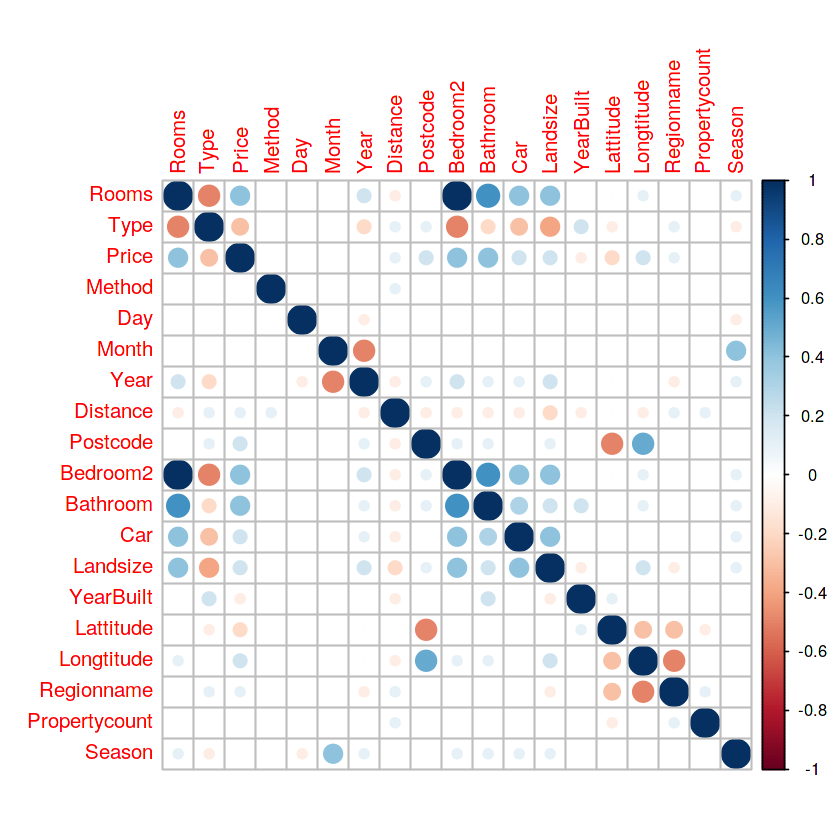

In [16]:
mel4 <- mel4 %>% separate(Date,sep = "/",into = c("Day","Month","Year"))

#converting month into season.
#spring (March, April, May), 
#summer (June, July, August), 
#autumn (September, October, November) 
#winter (December, January, February).

mel4$Season <- mel4$Month
mel4$Season <- as.numeric(mel4$Season)
mel4$Season[which(mel4$Season == 3 | mel4$Season == 4 | mel4$Season == 5)] = "Spring"
mel4$Season[which(mel4$Season == 6 |mel4$Season == 7 | mel4$Season == 8)] = "Summer"
mel4$Season[which(mel4$Season == 9 | mel4$Season == 10 | mel4$Season == 11)] = "Autumn"
mel4$Season[which(mel4$Season == 12 | mel4$Season == 1 | mel4$Season == 2)] = "Winter"

mel4$Season <- as.character(mel4$Season)
mel4$Season[mel4$Season == 'Spring'] <- 1
mel4$Season[mel4$Season == 'Summer'] <- 2
mel4$Season[mel4$Season == 'Autumn'] <- 3
mel4$Season[mel4$Season == 'Winter'] <- 4

#correlation checking of data
my_corrdata <- mel4[,-c(1,2,7,18)]
#converting the datacolumn into numeric
my_corrdata$Regionname <- as.numeric(my_corrdata$Regionname)
my_corrdata$Method <- as.numeric(my_corrdata$Method)
my_corrdata$Type <- as.numeric(my_corrdata$Type)
my_corrdata$Rooms <- as.numeric(my_corrdata$Rooms)
my_corrdata$Distance <- as.numeric(my_corrdata$Distance)
my_corrdata$Postcode <- as.numeric(my_corrdata$Postcode)
my_corrdata$Bedroom2 <- as.numeric(my_corrdata$Bedroom2)
my_corrdata$Bathroom <- as.numeric(my_corrdata$Bathroom)
my_corrdata$Car <- as.numeric(my_corrdata$Car)
my_corrdata$YearBuilt <- as.numeric(my_corrdata$YearBuilt)
my_corrdata$Day <- as.numeric(my_corrdata$Day)
my_corrdata$Month <- as.numeric(my_corrdata$Month)
my_corrdata$Year <- as.numeric(my_corrdata$Year)
my_corrdata$Propertycount <- as.numeric(my_corrdata$Propertycount)
my_corrdata$Season <- as.numeric(my_corrdata$Season)
corr <- round(cor(my_corrdata),1)

corrplot(corr)



In [17]:
#normalization of data
normalize <- function(x){
  return ((x - min(x)) / (max(x) - min(x)))
}

mel4$Landsize <- normalize(mel4$Landsize)
mel4$Distance <- normalize(mel4$Distance)

mel4$Rooms <- as.numeric(mel4$Rooms)
mel4$Rooms <- normalize(mel4$Rooms)

mel4$Bathroom <- as.numeric(mel4$Bathroom)
mel4$Bathroom <- normalize(mel4$Bathroom)

In [18]:
mel4$Car <- as.numeric(mel4$Car)
mel4$Car <- normalize(mel4$Car)

mel4$Propertycount <- as.numeric(mel4$Propertycount)
mel4$Propertycount <- normalize(mel4$Propertycount)
colnames(mel4)

head(mel4)

#one hot encoding and datatype corrections
mel4$Regionname <- as.factor(mel4$Regionname) #one hot needed
mel4$Method <- as.factor(mel4$Method) #one hot needed
mel4$Type <- as.factor(mel4$Type) #one hot needed 
mel4$Rooms <- as.factor(mel4$Rooms) 
mel4$Car <- as.numeric(mel4$Car)
mel4$Bedroom2 <- as.factor(mel4$Bedroom2) 
mel4$Bathroom <- as.factor(mel4$Bathroom) 
mel4$YearBuilt <- as.numeric(mel4$YearBuilt)
mel4$Day <- as.numeric(mel4$Day)
mel4$Month <- as.factor(mel4$Month) #as we have create a new variable season using Month we will not be using month
mel4$Propertycount <- as.character(mel4$Propertycount) 
mel4$Propertycount <- as.numeric(mel4$Propertycount)
mel4$Season <- as.numeric(mel4$Season) #one hot encoding needed

#one hot encoding of type
type_ <- factor(mel4$Type)
dumm <- as.data.frame(model.matrix(~type_)[,-1])
mel4 <- cbind(dumm,mel4)

#one hot encoding of Method
Method_ <- factor(mel4$Method)
dumm <- as.data.frame(model.matrix(~Method_)[,-1])
mel4 <- cbind(dumm,mel4)

#one hot encoding of season
Season_ <- factor(mel4$Season)
dumm <- as.data.frame(model.matrix(~Season_)[,-1])
mel4 <- cbind(dumm,mel4)


mel4$CouncilArea <- str_replace_all(mel4$CouncilArea,c(" "="_"))
Council_ <- factor(mel4$CouncilArea)
dumm <- as.data.frame(model.matrix(~Council_)[,-1])
mel4 <- cbind(dumm,mel4)

#test_df <- mel4[,-c(40,41,42,43,44,45,47,48,51,54,55,56,58,59,60,61)]

colnames(mel4)

#removing the Rooms from the final dataset as we observed high collinearity between Bedroom2 and Rooms
test_df <- mel4[,-c(42,43,45,47,48,49,50,51,53,54,58,59,62,63,64)]
colnames(test_df)
#splitting the data into train and test
create_train_test <- function(data, size = 0.7, train = TRUE) {
  n_row = nrow(data)
  total_row = size * n_row
  train_sample <- 1: total_row
  if (train == TRUE) {
    return (data[train_sample, ])
  } else {
    return (data[-train_sample, ])
  }
}

set.seed(123)
train_data <- create_train_test(test_df,train = TRUE)
test_data <- create_train_test(test_df,train = FALSE)

[1] "Suburb"        "Address"       "Rooms"         "Type"         
 [5] "Price"         "Method"        "SellerG"       "Day"          
 [9] "Month"         "Year"          "Distance"      "Postcode"     
[13] "Bedroom2"      "Bathroom"      "Car"           "Landsize"     
[17] "YearBuilt"     "CouncilArea"   "Lattitude"     "Longtitude"   
[21] "Regionname"    "Propertycount" "Season"

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Day,Month,Year,⋯,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Season
,<fct>,<chr>,<dbl>,<chr>,<int>,<chr>,<fct>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
2,Abbotsford,85 Turner St,0.1666667,1,1480000,3,Biggin,3,12,2016,⋯,0.1111111,0.05555556,0.06788079,0,Yarra City Council,-37.7996,144.9984,3,0.5507692,4
3,Abbotsford,25 Bloomburg St,0.1666667,1,1035000,3,Biggin,4,02,2016,⋯,0.1111111,0.00000000,0.02980132,1900,Yarra City Council,-37.8079,144.9934,3,0.5507692,4
5,Abbotsford,5 Charles St,0.3333333,1,1465000,6,Biggin,4,03,2017,⋯,0.3333333,0.00000000,0.01158940,1900,Yarra City Council,-37.8093,144.9944,3,0.5507692,1
6,Abbotsford,40 Federation La,0.3333333,1,850000,1,Biggin,4,03,2017,⋯,0.3333333,0.05555556,0.34271523,0,Yarra City Council,-37.7969,144.9969,3,0.5507692,1
7,Abbotsford,55a Park St,0.5000000,1,1600000,8,Nelson,4,06,2016,⋯,0.1111111,0.11111111,0.00000000,2014,Yarra City Council,-37.8072,144.9941,3,0.5507692,2
11,Abbotsford,129 Charles St,0.1666667,1,941000,3,Jellis,7,05,2016,⋯,0.1111111,0.00000000,0.05049669,0,Yarra City Council,-37.8041,144.9953,3,0.5507692,1


[1] "Council_Bayside_City_Council"          
 [2] "Council_Boroondara_City_Council"       
 [3] "Council_Brimbank_City_Council"         
 [4] "Council_Cardinia_Shire_Council"        
 [5] "Council_Casey_City_Council"            
 [6] "Council_Darebin_City_Council"          
 [7] "Council_Frankston_City_Council"        
 [8] "Council_Glen_Eira_City_Council"        
 [9] "Council_Greater_Dandenong_City_Council"
[10] "Council_Hobsons_Bay_City_Council"      
[11] "Council_Hume_City_Council"             
[12] "Council_Kingston_City_Council"         
[13] "Council_Knox_City_Council"             
[14] "Council_Macedon_Ranges_Shire_Council"  
[15] "Council_Manningham_City_Council"       
[16] "Council_Maribyrnong_City_Council"      
[17] "Council_Maroondah_City_Council"        
[18] "Council_Melbourne_City_Council"        
[19] "Council_Melton_City_Council"           
[20] "Council_Mitchell_Shire_Council"        
[21] "Council_Monash_City_Council"           
[22] "Council_Moonee_Valley_City_Council"    
[23] "Council_Moorabool_Shire_Council"       
[24] "Council_Moreland_City_Council"         
[25] "Council_Nillumbik_Shire_Council"       
[26] "Council_Port_Phillip_City_Council"     
[27] "Council_Stonnington_City_Council"      
[28] "Council_Whitehorse_City_Council"       
[29] "Council_Whittlesea_City_Council"       
[30] "Council_Wyndham_City_Council"          
[31] "Council_Yarra_City_Council"            
[32] "Council_Yarra_Ranges_Shire_Council"    
[33] "Season_2"                              
[34] "Season_3"                              
[35] "Season_4"                              
[36] "Method_3"                              
[37] "Method_4"                              
[38] "Method_6"                              
[39] "Method_8"                              
[40] "type_2"                                
[41] "type_3"                                
[42] "Suburb"                                
[43] "Address"                               
[44] "Rooms"                                 
[45] "Type"                                  
[46] "Price"                                 
[47] "Method"                                
[48] "SellerG"                               
[49] "Day"                                   
[50] "Month"                                 
[51] "Year"                                  
[52] "Distance"                              
[53] "Postcode"                              
[54] "Bedroom2"                              
[55] "Bathroom"                              
[56] "Car"                                   
[57] "Landsize"                              
[58] "YearBuilt"                             
[59] "CouncilArea"                           
[60] "Lattitude"                             
[61] "Longtitude"                            
[62] "Regionname"                            
[63] "Propertycount"                         
[64] "Season"

[1] "Council_Bayside_City_Council"          
 [2] "Council_Boroondara_City_Council"       
 [3] "Council_Brimbank_City_Council"         
 [4] "Council_Cardinia_Shire_Council"        
 [5] "Council_Casey_City_Council"            
 [6] "Council_Darebin_City_Council"          
 [7] "Council_Frankston_City_Council"        
 [8] "Council_Glen_Eira_City_Council"        
 [9] "Council_Greater_Dandenong_City_Council"
[10] "Council_Hobsons_Bay_City_Council"      
[11] "Council_Hume_City_Council"             
[12] "Council_Kingston_City_Council"         
[13] "Council_Knox_City_Council"             
[14] "Council_Macedon_Ranges_Shire_Council"  
[15] "Council_Manningham_City_Council"       
[16] "Council_Maribyrnong_City_Council"      
[17] "Council_Maroondah_City_Council"        
[18] "Council_Melbourne_City_Council"        
[19] "Council_Melton_City_Council"           
[20] "Council_Mitchell_Shire_Council"        
[21] "Council_Monash_City_Council"           
[22] "Council_Moonee_Valley_City_Council"    
[23] "Council_Moorabool_Shire_Council"       
[24] "Council_Moreland_City_Council"         
[25] "Council_Nillumbik_Shire_Council"       
[26] "Council_Port_Phillip_City_Council"     
[27] "Council_Stonnington_City_Council"      
[28] "Council_Whitehorse_City_Council"       
[29] "Council_Whittlesea_City_Council"       
[30] "Council_Wyndham_City_Council"          
[31] "Council_Yarra_City_Council"            
[32] "Council_Yarra_Ranges_Shire_Council"    
[33] "Season_2"                              
[34] "Season_3"                              
[35] "Season_4"                              
[36] "Method_3"                              
[37] "Method_4"                              
[38] "Method_6"                              
[39] "Method_8"                              
[40] "type_2"                                
[41] "type_3"                                
[42] "Rooms"                                 
[43] "Price"                                 
[44] "Distance"                              
[45] "Bathroom"                              
[46] "Car"                                   
[47] "Landsize"                              
[48] "Lattitude"                             
[49] "Longtitude"

[1] "Council_Bayside_City_Council"          
 [2] "Council_Boroondara_City_Council"       
 [3] "Council_Brimbank_City_Council"         
 [4] "Council_Cardinia_Shire_Council"        
 [5] "Council_Casey_City_Council"            
 [6] "Council_Darebin_City_Council"          
 [7] "Council_Frankston_City_Council"        
 [8] "Council_Glen_Eira_City_Council"        
 [9] "Council_Greater_Dandenong_City_Council"
[10] "Council_Hobsons_Bay_City_Council"      
[11] "Council_Hume_City_Council"             
[12] "Council_Kingston_City_Council"         
[13] "Council_Knox_City_Council"             
[14] "Council_Macedon_Ranges_Shire_Council"  
[15] "Council_Manningham_City_Council"       
[16] "Council_Maribyrnong_City_Council"      
[17] "Council_Maroondah_City_Council"        
[18] "Council_Melbourne_City_Council"        
[19] "Council_Melton_City_Council"           
[20] "Council_Mitchell_Shire_Council"        
[21] "Council_Monash_City_Council"           
[22] "Council_Moonee_Valley_City_Council"    
[23] "Council_Moorabool_Shire_Council"       
[24] "Council_Moreland_City_Council"         
[25] "Council_Nillumbik_Shire_Council"       
[26] "Council_Port_Phillip_City_Council"     
[27] "Council_Stonnington_City_Council"      
[28] "Council_Whitehorse_City_Council"       
[29] "Council_Whittlesea_City_Council"       
[30] "Council_Wyndham_City_Council"          
[31] "Council_Yarra_City_Council"            
[32] "Council_Yarra_Ranges_Shire_Council"    
[33] "Season_2"                              
[34] "Season_3"                              
[35] "Season_4"                              
[36] "Method_3"                              
[37] "Method_4"                              
[38] "Method_6"                              
[39] "Method_8"                              
[40] "type_2"                                
[41] "type_3"                                
[42] "Rooms"                                 
[43] "Price"                                 
[44] "Distance"                              
[45] "Bathroom"                              
[46] "Car"                                   
[47] "Landsize"                              
[48] "Lattitude"                             
[49] "Longtitude"


Call:
lm(formula = Price ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1538214  -219931   -36880   158636  7781226 

Coefficients:
                                        Estimate Std. Error t value
(Intercept)                            -57447697   16811374  -3.417
Council_Bayside_City_Council              262166      37704   6.953
Council_Boroondara_City_Council           469599      21343  22.003
Council_Brimbank_City_Council            -341206      37457  -9.109
Council_Cardinia_Shire_Council          -1201870     131798  -9.119
Council_Casey_City_Council              -1174178      66498 -17.657
Council_Darebin_City_Council               65725      19654   3.344
Council_Frankston_City_Council          -1310758      71064 -18.445
Council_Glen_Eira_City_Council            -38199      31728  -1.204
Council_Greater_Dandenong_City_Council   -736451      55248 -13.330
Council_Hobsons_Bay_City_Council         -210445      40100  -5.248
Council_Hume_Ci

Warning message:
“not plotting observations with leverage one:
  574, 10402, 13263”


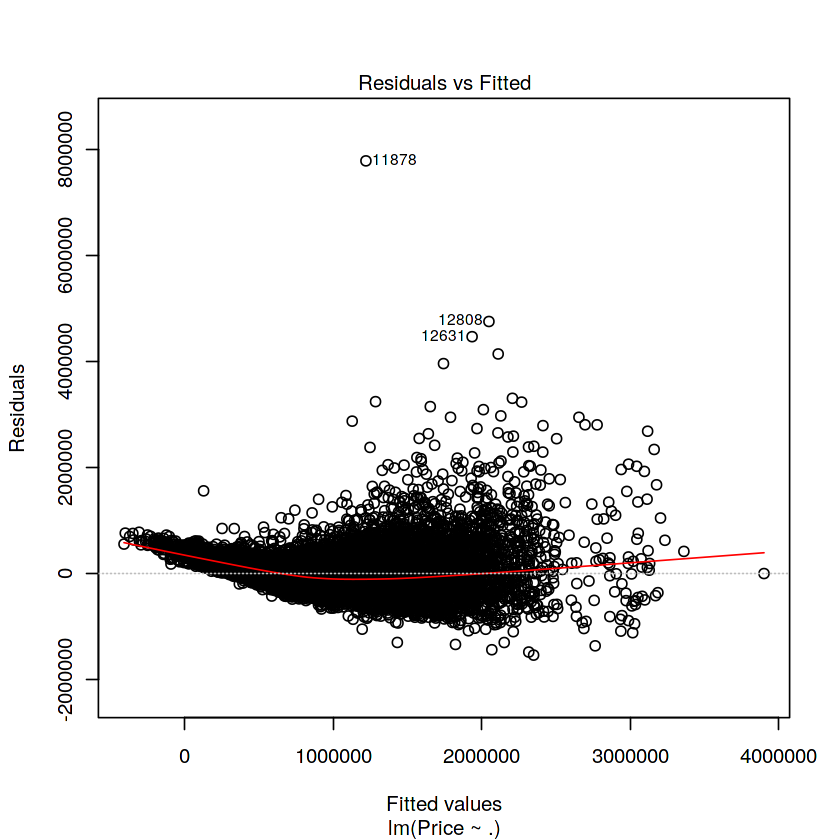

Warning message:
“not plotting observations with leverage one:
  574, 10402, 13263”


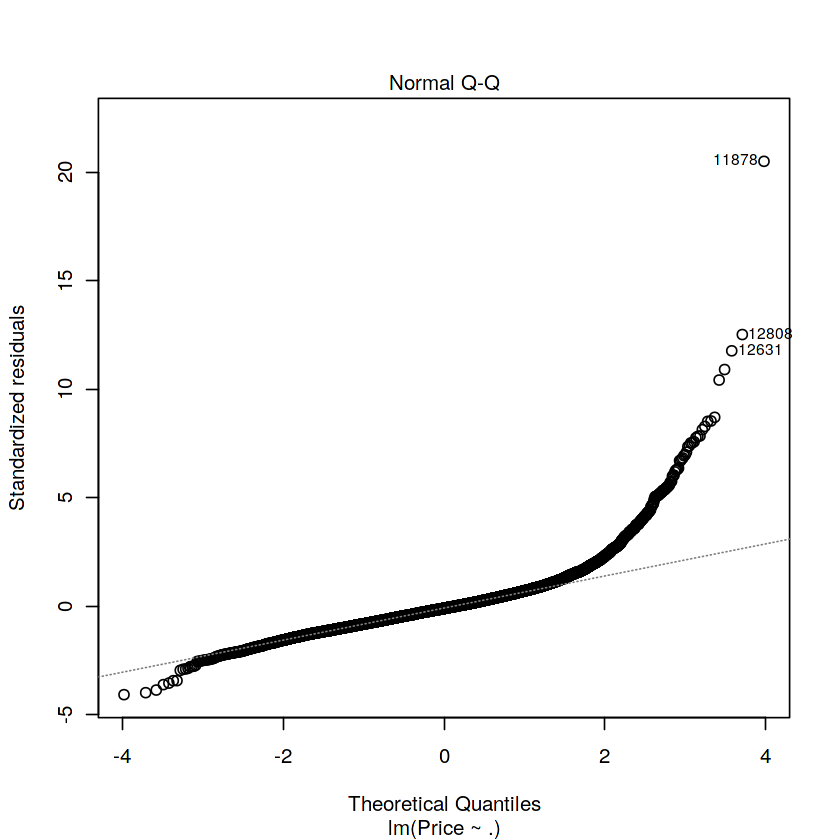

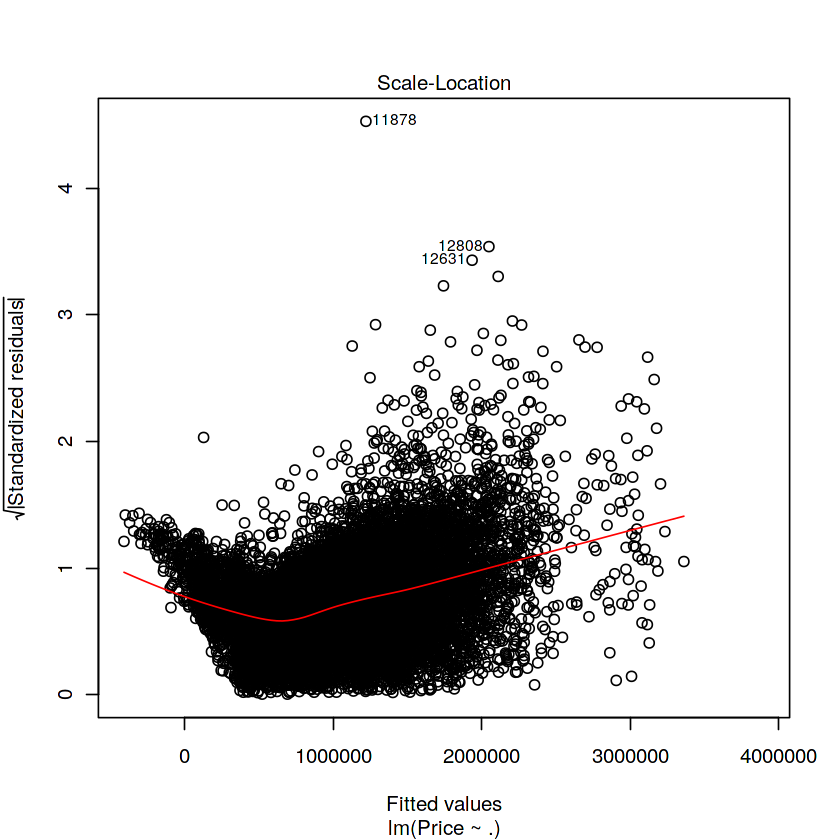

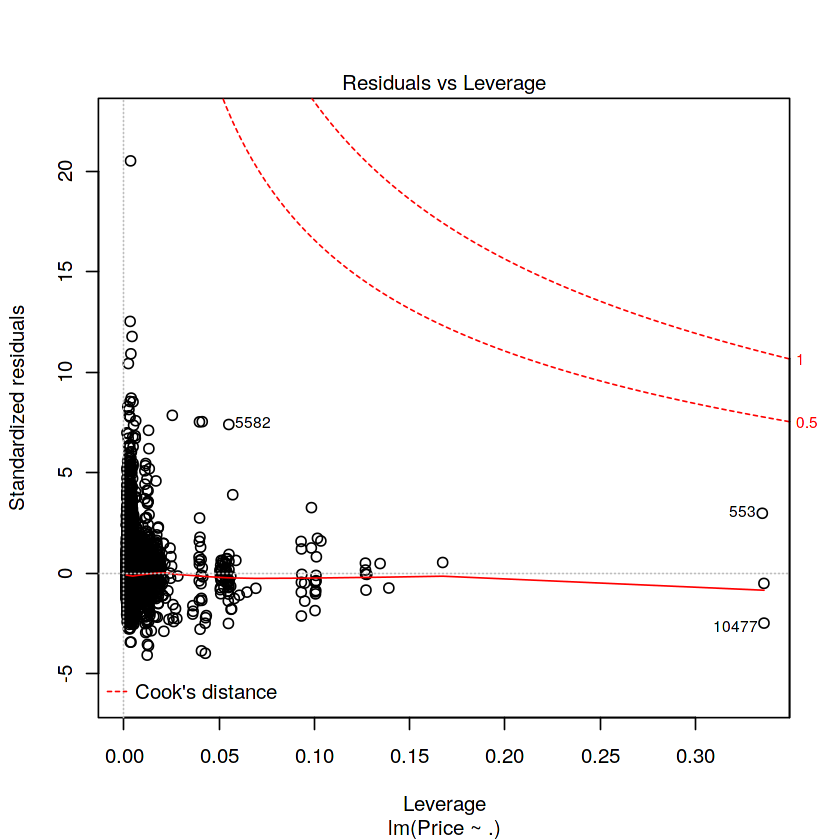

In [19]:
#####################################################
#### ---------Linear Regression
######################################################

colnames(train_data)

#full model 
model_l <- lm(Price ~ .,data = train_data)
summary(model_l)
plot(model_l)

In [20]:
vif(model_l)
options(warn=-1)
predicted_ys <- predict(model_l,newdata=test_data)
observed_ys <- test_data$Price
SSE <- sum((observed_ys - predicted_ys) ^ 2)
SST <- sum((observed_ys - mean(observed_ys)) ^ 2)
r2 <- 1 - SSE/SST
r2

,GVIF,Df,GVIF^(1/(2*Df))
Council_Bayside_City_Council,6.158555,1,2.481644
Council_Boroondara_City_Council,4.174420,1,2.043140
Council_Brimbank_City_Council,6.236782,1,2.497355
Council_Cardinia_Shire_Council,1.201224,1,1.096003
Council_Casey_City_Council,1.797996,1,1.340894
Council_Darebin_City_Council,3.239061,1,1.799739
Council_Frankston_City_Council,2.572720,1,1.603970
Council_Glen_Eira_City_Council,6.234531,1,2.496904
Council_Greater_Dandenong_City_Council,1.680355,1,1.296285
Council_Hobsons_Bay_City_Council,5.100359,1,2.258397


[1] 0.6276737

In [21]:
##############################################
###--------STEPWISE MODEL
###############################################

step_model <- stepAIC(model_l,direction="both",trace=1)
summary(step_model)
step_model$anova
options(warn=-1)


Start:  AIC=369089.8
Price ~ Council_Bayside_City_Council + Council_Boroondara_City_Council + 
    Council_Brimbank_City_Council + Council_Cardinia_Shire_Council + 
    Council_Casey_City_Council + Council_Darebin_City_Council + 
    Council_Frankston_City_Council + Council_Glen_Eira_City_Council + 
    Council_Greater_Dandenong_City_Council + Council_Hobsons_Bay_City_Council + 
    Council_Hume_City_Council + Council_Kingston_City_Council + 
    Council_Knox_City_Council + Council_Macedon_Ranges_Shire_Council + 
    Council_Manningham_City_Council + Council_Maribyrnong_City_Council + 
    Council_Maroondah_City_Council + Council_Melbourne_City_Council + 
    Council_Melton_City_Council + Council_Mitchell_Shire_Council + 
    Council_Monash_City_Council + Council_Moonee_Valley_City_Council + 
    Council_Moorabool_Shire_Council + Council_Moreland_City_Council + 
    Council_Nillumbik_Shire_Council + Council_Port_Phillip_City_Council + 
    Council_Stonnington_City_Council + Council_Whi


Call:
lm(formula = Price ~ Council_Bayside_City_Council + Council_Boroondara_City_Council + 
    Council_Brimbank_City_Council + Council_Cardinia_Shire_Council + 
    Council_Casey_City_Council + Council_Darebin_City_Council + 
    Council_Frankston_City_Council + Council_Greater_Dandenong_City_Council + 
    Council_Hobsons_Bay_City_Council + Council_Hume_City_Council + 
    Council_Kingston_City_Council + Council_Knox_City_Council + 
    Council_Manningham_City_Council + Council_Maribyrnong_City_Council + 
    Council_Maroondah_City_Council + Council_Melbourne_City_Council + 
    Council_Melton_City_Council + Council_Monash_City_Council + 
    Council_Moonee_Valley_City_Council + Council_Moorabool_Shire_Council + 
    Council_Moreland_City_Council + Council_Nillumbik_Shire_Council + 
    Council_Port_Phillip_City_Council + Council_Stonnington_City_Council + 
    Council_Whitehorse_City_Council + Council_Whittlesea_City_Council + 
    Council_Wyndham_City_Council + Council_Yarra_City

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,14300,2066477202992372,369089.8
- Method_4,1,927113108,14301,2066478130105480,369087.8
- Council_Mitchell_Shire_Council,1,18744739114,14302,2066496874844594,369086.0
- Council_Macedon_Ranges_Shire_Council,1,50654560190,14303,2066547529404783,369084.3
- Season_4,1,78369543839,14304,2066625898948622,369082.9
- Council_Glen_Eira_City_Council,1,207271919913,14305,2066833170868536,369082.3
- Longtitude,1,224722196779,14306,2067057893065314,369081.9
- Season_3,1,229504140183,14307,2067287397205497,369081.5


In [22]:
predicted_ys <- predict(step_model,newdata=test_data)
observed_ys <- test_data$Price
lm.SSE <- sum((observed_ys - predicted_ys) ^ 2)
lm.SST <- sum((observed_ys - mean(observed_ys)) ^ 2)
lm.r2 <- 1 - lm.SSE/lm.SST
lm.r2
vif(step_model)

[1] 0.6280928

,GVIF,Df,GVIF^(1/(2*Df))
Council_Bayside_City_Council,1.671484,1,1.292859
Council_Boroondara_City_Council,1.900177,1,1.378469
Council_Brimbank_City_Council,1.529908,1,1.236895
Council_Cardinia_Shire_Council,1.032147,1,1.015946
Council_Casey_City_Council,1.156890,1,1.075588
Council_Darebin_City_Council,2.188989,1,1.479523
Council_Frankston_City_Council,1.377774,1,1.173786
Council_Greater_Dandenong_City_Council,1.125452,1,1.060873
Council_Hobsons_Bay_City_Council,1.314910,1,1.146695
Council_Hume_City_Council,1.703759,1,1.305281


[1] 229.5772

[1] "Council_Bayside_City_Council"          
 [2] "Council_Boroondara_City_Council"       
 [3] "Council_Brimbank_City_Council"         
 [4] "Council_Cardinia_Shire_Council"        
 [5] "Council_Casey_City_Council"            
 [6] "Council_Darebin_City_Council"          
 [7] "Council_Frankston_City_Council"        
 [8] "Council_Glen_Eira_City_Council"        
 [9] "Council_Greater_Dandenong_City_Council"
[10] "Council_Hobsons_Bay_City_Council"      
[11] "Council_Hume_City_Council"             
[12] "Council_Kingston_City_Council"         
[13] "Council_Knox_City_Council"             
[14] "Council_Macedon_Ranges_Shire_Council"  
[15] "Council_Manningham_City_Council"       
[16] "Council_Maribyrnong_City_Council"      
[17] "Council_Maroondah_City_Council"        
[18] "Council_Melbourne_City_Council"        
[19] "Council_Melton_City_Council"           
[20] "Council_Mitchell_Shire_Council"        
[21] "Council_Monash_City_Council"           
[22] "Council_Moonee_Valley_City_Council"    
[23] "Council_Moorabool_Shire_Council"       
[24] "Council_Moreland_City_Council"         
[25] "Council_Nillumbik_Shire_Council"       
[26] "Council_Port_Phillip_City_Council"     
[27] "Council_Stonnington_City_Council"      
[28] "Council_Whitehorse_City_Council"       
[29] "Council_Whittlesea_City_Council"       
[30] "Council_Wyndham_City_Council"          
[31] "Council_Yarra_City_Council"            
[32] "Council_Yarra_Ranges_Shire_Council"    
[33] "Season_2"                              
[34] "Season_3"                              
[35] "Season_4"                              
[36] "Method_3"                              
[37] "Method_6"                              
[38] "Method_8"                              
[39] "type_2"                                
[40] "type_3"                                
[41] "Rooms0.166666666666667"                
[42] "Rooms0.333333333333333"                
[43] "Rooms0.5"                              
[44] "Rooms0.666666666666667"                
[45] "Rooms0.833333333333333"                
[46] "Rooms1"                                
[47] "Distance"                              
[48] "Bathroom0.111111111111111"             
[49] "Bathroom0.222222222222222"             
[50] "Bathroom0.333333333333333"             
[51] "Bathroom0.444444444444444"             
[52] "Bathroom0.666666666666667"             
[53] "Bathroom0.777777777777778"             
[54] "Bathroom0.888888888888889"             
[55] "Bathroom1"                             
[56] "Car"                                   
[57] "Landsize"                              
[58] "Lattitude"                             
[59] "Longtitude"

          Length Class     Mode   
a0         1     -none-    numeric
beta      60     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       5     -none-    call   
nobs       1     -none-    numeric

  (Intercept) Council_Bayside_City_Council Council_Boroondara_City_Council
 Min.   :1    Min.   :0.00000              Min.   :0.00000                
 1st Qu.:1    1st Qu.:0.00000              1st Qu.:0.00000                
 Median :1    Median :0.00000              Median :0.00000                
 Mean   :1    Mean   :0.04988              Mean   :0.06044                
 3rd Qu.:1    3rd Qu.:0.00000              3rd Qu.:0.00000                
 Max.   :1    Max.   :1.00000              Max.   :1.00000                
 Council_Brimbank_City_Council Council_Cardinia_Shire_Council
 Min.   :0.00000               Min.   :0.000000              
 1st Qu.:0.00000               1st Qu.:0.000000              
 Median :0.00000               Median :0.000000              
 Mean   :0.06499               Mean   :0.001787              
 3rd Qu.:0.00000               3rd Qu.:0.000000              
 Max.   :1.00000               Max.   :1.000000              
 Council_Casey_City_Council Council_Dareb

[1] 0.6273078

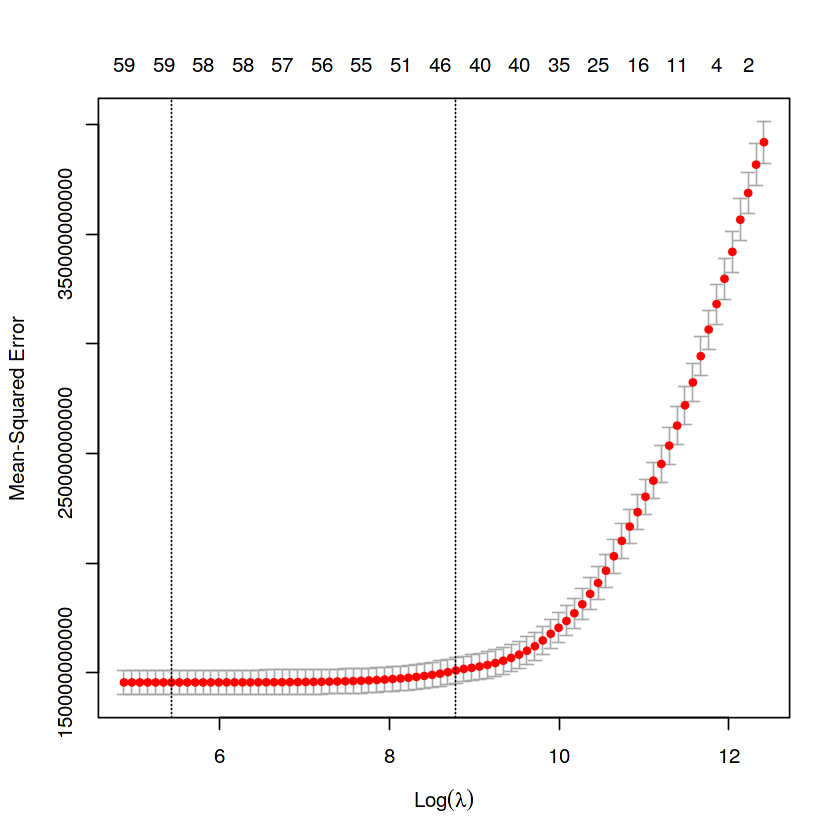

In [23]:
############################################################
############-----------Lasso regression
############################################################

x <- model.matrix(Price~.,data=train_data)
x_train <- x[,-1]
y_train <- train_data$Price
crossval <-  cv.glmnet(x = x_train, y = y_train)
plot(crossval)
penalty <- crossval$lambda.min
penalty
fit1 <-glmnet(x = x_train, y = y_train, alpha = 1, lambda = penalty ) #estimate the model with that
c <- coef(fit1)
inds<-which(c!=0)
variables<-row.names(c)[inds]
variables<-variables[variables %ni% '(Intercept)']
variables
summary(fit1)

x_1 <-model.matrix(Price~.,data=test_data)
x_test <- x_1[,-1]
y_test <- test_data$Price

summary(x_1)
predicted_ys <- predict(fit1, s = penalty, newx = x_test)
observed_ys <- test_data$Price
lm.SSE <- sum((observed_ys - predicted_ys) ^ 2)
lm.SST <- sum((observed_ys - mean(observed_ys)) ^ 2)
lm.r2 <- 1 - lm.SSE/lm.SST
lm.r2


Call:
rpart(formula = Price ~ ., data = train_data)
  n= 14361 

           CP nsplit rel error    xerror       xstd
1  0.15979222      0 1.0000000 1.0001983 0.02723581
2  0.08241533      1 0.8402078 0.8405480 0.02358225
3  0.07875580      2 0.7577924 0.7520467 0.02294884
4  0.04902198      3 0.6790366 0.6795674 0.02228897
5  0.04372912      4 0.6300147 0.6306230 0.02173550
6  0.03620536      5 0.5862855 0.5879856 0.02070802
7  0.02608737      6 0.5500802 0.5429320 0.01988319
8  0.02295836      7 0.5239928 0.5195067 0.01916080
9  0.01600244      8 0.5010345 0.5074235 0.01889009
10 0.01460007      9 0.4850320 0.4856895 0.01801009
11 0.01356944     10 0.4704319 0.4790948 0.01780655
12 0.01199327     11 0.4568625 0.4610549 0.01768474
13 0.01000000     13 0.4328760 0.4469059 0.01779862

Variable importance
                           Rooms                        Lattitude 
                              25                               13 
 Council_Boroondara_City_Council                    

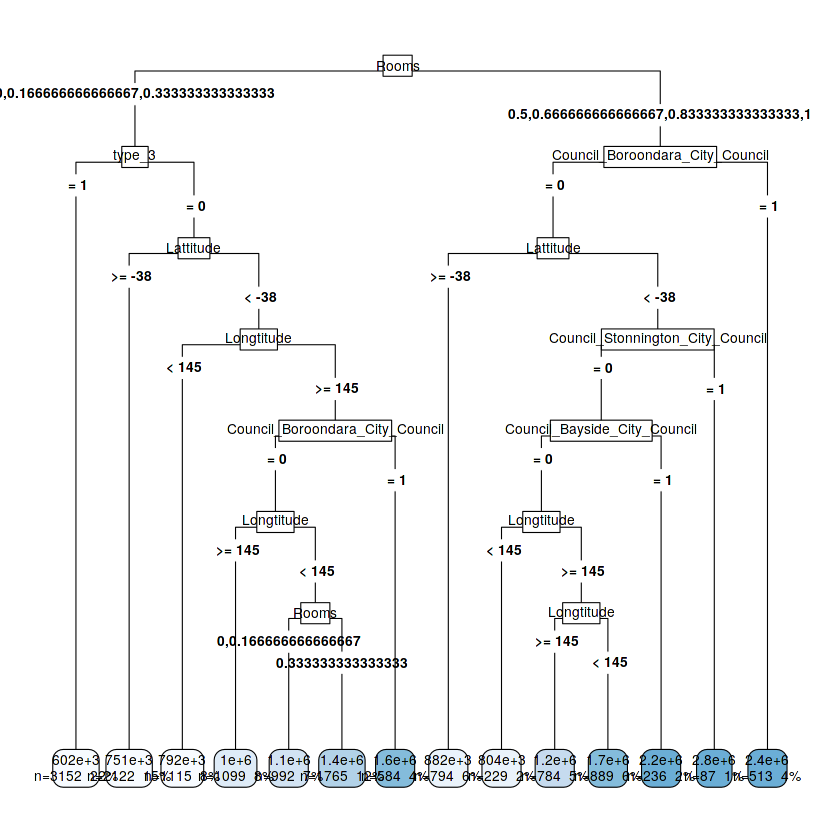

In [24]:
######################################################
#### ---------Decision Tree 
######################################################

#test_df <- mel4[,-c(17,18,19,20,22,23,25,26,33,34,35,37)]
#test_df$Postcode <- as.numeric(test_df$Postcode)
set.seed(123)


tree.model <- rpart(Price ~ .,data = train_data)
summary(tree.model)
rpart.plot(tree.model,type = 5,extra=101)

# prune the tree 
pfit<- prune(tree.model, cp=tree.model$cptable[which.min(tree.model$cptable[,"xerror"]),"CP"])
rpart.plot(pfit,type = 5,extra=101)



In [25]:
tree.pred <- predict(pfit,newdata = test_data)
dt.SSE <- sum((test_data[,"Price"]-tree.pred)^2)
dt.SST <- sum((test_data[,"Price"] - mean(test_data[,"Price"]))^2)
dt.r2 <- 1 - dt.SSE/dt.SST
dt.r2

[1] 0.5742098

In [26]:
#######################################################
#### ---------Random Forests
#######################################################

rf <- randomForest(Price ~ .,data = train_data)
rf.pred <- predict(rf,newdata = test_data)
SSE.rf <- sum((test_data[,"Price"]-rf.pred)^2)
SST.rf <- sum((test_data[,"Price"] - mean(test_data[,"Price"]))^2)
r2.rf <- 1 - SSE.rf/SST.rf
r2.rf

[1] 0.8084237

With compared Analysis of accuracy for the above 3 models it can be observed that Random Forest Works best with maximum accuracy. 